# Compare Netflix and Prime video with time series plots


In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Import extracted tweets on "movie" or "series"
brand  = pd.read_csv("brand.csv")

In [3]:
brand.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,297029836,1246438744057667585,2020-04-04T14:05:28Z,BallstonParkApt,Who says you can't binge your favorite show or...,SOCi - Simplifying Social Media,216,NaN,NaN,NaN,...,1187,4,2011-05-11T20:18:05Z,False,https://t.co/dKn94AaGr2,http://www.ballstonpark.com,NaN,https://pbs.twimg.com/profile_banners/29702983...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1049755861...
1,912607432106426369,1246438455908765696,2020-04-04T14:04:20Z,maturi_vijay,@kiranpspk_88 @soooftie If you do a movie it h...,Twitter for Android,274,1.246389e+18,1.237580e+18,kiranpspk_88,...,1945,8312,2017-09-26T09:19:02Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/91260743...,NaN,http://pbs.twimg.com/profile_images/1132293751...
2,155320450,1246438335184322562,2020-04-04T14:03:51Z,danielleroj,how to make a Taurus go “🥺🥺🥺”: watch a corny m...,Twitter for iPhone,140,NaN,NaN,NaN,...,53503,45389,2010-06-13T20:19:29Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/15532045...,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1174362606...
3,2702147472,1246438027901140994,2020-04-04T14:02:38Z,AWeaver26,Every time I watch a new show or movie these d...,Twitter for iPhone,139,NaN,NaN,NaN,...,39489,14247,2014-08-03T01:03:26Z,False,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9685766352...
4,213828820,1246437924788482051,2020-04-04T14:02:13Z,XRP_ENTHOUSIAST,I haven’t watched a single tv show or movie du...,Twitter for iPhone,77,NaN,NaN,NaN,...,641,786,2010-11-09T22:13:56Z,False,https://t.co/KfZoex5zVR,https://www.youtube.com/channel/UCvZ-WSIkQK1V3...,NaN,https://pbs.twimg.com/profile_banners/21382882...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1087429815...


In [4]:
brand.shape


(9733, 90)

In [5]:
print(brand.created_at)


0       2020-04-04T14:05:28Z
1       2020-04-04T14:04:20Z
2       2020-04-04T14:03:51Z
3       2020-04-04T14:02:38Z
4       2020-04-04T14:02:13Z
                ...         
9728    2020-03-27T19:24:06Z
9729    2020-03-27T19:22:17Z
9730    2020-03-27T19:20:48Z
9731    2020-03-27T19:15:03Z
9732    2020-03-27T19:15:03Z
Name: created_at, Length: 9733, dtype: object


In [6]:
brand['created_at']=pd.to_datetime(brand['created_at'])


In [7]:
brand['created_at'].head()


0   2020-04-04 14:05:28+00:00
1   2020-04-04 14:04:20+00:00
2   2020-04-04 14:03:51+00:00
3   2020-04-04 14:02:38+00:00
4   2020-04-04 14:02:13+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [8]:

brand = brand.set_index('created_at')


In [9]:
brand.head()


,user_id,status_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
created_at,,,,,,,,,,,,,,,,,,,,,
2020-04-04 14:05:28+00:00,297029836,1246438744057667585,BallstonParkApt,Who says you can't binge your favorite show or...,SOCi - Simplifying Social Media,216,NaN,NaN,NaN,False,...,1187,4,2011-05-11T20:18:05Z,False,https://t.co/dKn94AaGr2,http://www.ballstonpark.com,NaN,https://pbs.twimg.com/profile_banners/29702983...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1049755861...
2020-04-04 14:04:20+00:00,912607432106426369,1246438455908765696,maturi_vijay,@kiranpspk_88 @soooftie If you do a movie it h...,Twitter for Android,274,1.246389e+18,1.237580e+18,kiranpspk_88,False,...,1945,8312,2017-09-26T09:19:02Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/91260743...,NaN,http://pbs.twimg.com/profile_images/1132293751...
2020-04-04 14:03:51+00:00,155320450,1246438335184322562,danielleroj,how to make a Taurus go “🥺🥺🥺”: watch a corny m...,Twitter for iPhone,140,NaN,NaN,NaN,False,...,53503,45389,2010-06-13T20:19:29Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/15532045...,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1174362606...
2020-04-04 14:02:38+00:00,2702147472,1246438027901140994,AWeaver26,Every time I watch a new show or movie these d...,Twitter for iPhone,139,NaN,NaN,NaN,False,...,39489,14247,2014-08-03T01:03:26Z,False,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9685766352...
2020-04-04 14:02:13+00:00,213828820,1246437924788482051,XRP_ENTHOUSIAST,I haven’t watched a single tv show or movie du...,Twitter for iPhone,77,NaN,NaN,NaN,False,...,641,786,2010-11-09T22:13:56Z,False,https://t.co/KfZoex5zVR,https://www.youtube.com/channel/UCvZ-WSIkQK1V3...,NaN,https://pbs.twimg.com/profile_banners/21382882...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1087429815...


In [10]:
import matplotlib.pyplot as plt
#Function to extract tweets that contain a particular word
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    return contains_column

In [11]:
brand['netflix']=check_word_in_tweet('netflix', brand)


In [12]:
brand['prime'] = check_word_in_tweet('primevideo', brand)


In [13]:
brand[['netflix','prime']].head(20)


,netflix,prime
created_at,,
2020-04-04 14:05:28+00:00,True,False
2020-04-04 14:04:20+00:00,False,False
2020-04-04 14:03:51+00:00,False,False
2020-04-04 14:02:38+00:00,False,False
2020-04-04 14:02:13+00:00,False,False
2020-04-04 14:00:58+00:00,False,False
2020-04-04 13:59:32+00:00,False,False
2020-04-04 13:59:21+00:00,False,False
2020-04-04 13:57:17+00:00,False,False


In [14]:
# Total number of tweets per day - netflix

sum_netflix = brand['netflix'].resample('1d').sum()
sum_netflix

created_at
2020-03-27 00:00:00+00:00     26
2020-03-28 00:00:00+00:00     67
2020-03-29 00:00:00+00:00    103
2020-03-30 00:00:00+00:00     93
2020-03-31 00:00:00+00:00     93
2020-04-01 00:00:00+00:00     69
2020-04-02 00:00:00+00:00     69
2020-04-03 00:00:00+00:00     74
2020-04-04 00:00:00+00:00     32
Freq: D, Name: netflix, dtype: int64

In [15]:
# Total number of tweets per day - Prime
sum_prime = brand['prime'].resample('1 d').sum()
sum_prime

created_at
2020-03-27 00:00:00+00:00     0
2020-03-28 00:00:00+00:00     2
2020-03-29 00:00:00+00:00     1
2020-03-30 00:00:00+00:00     0
2020-03-31 00:00:00+00:00    13
2020-04-01 00:00:00+00:00     5
2020-04-02 00:00:00+00:00     2
2020-04-03 00:00:00+00:00     0
2020-04-04 00:00:00+00:00     0
Freq: D, Name: prime, dtype: int64

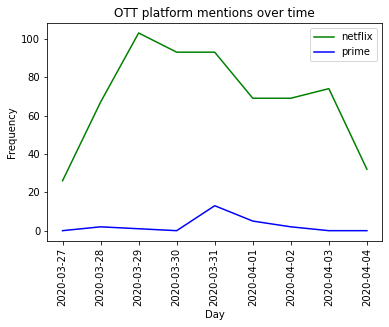

In [17]:
#Plot sum netflix/prime by day
plt.plot(sum_netflix.index.date, sum_netflix, color='green')
plt.plot(sum_prime.index.date, sum_prime, color='blue')


# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('OTT platform mentions over time')
plt.legend(('netflix', 'prime'))
plt.xticks(rotation='vertical')
plt.show()